In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Part I: Tidying and Reshaping Data

In [2]:
#Loading data from Github link
Data = pd.read_csv('https://raw.githubusercontent.com/atreish/AIM-5001/main/M11_Data%20(1).csv')
Data

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


# 1.1 
Use your knowledge of combining and reshaping data in Pandas to tidy and transform/reshape the data contained within the dataframe. To get started, think about how you would want the data to appear if it were converted to “long” format, e.g., how would you define a “single observation” for the data shown in the graphic?; How many key values are associated with each data value?; How many columns should your long format structure contain based on the information provided in the graphic shown above?; What would the column headings for the long structure be?; etc. Use your answers to these questions to guide your reshaping/transformational work on the data. Your reshaping/transformational steps must include converting the above table to a “tidy” long format. Additional transformational steps (e.g., filling in missing data values, renaming columns, etc.) should be performed as needed to ensure that your data is, in fact, “tidy”.

We have an entire row of NaN values, so we apply the drop function to remove it

In [3]:
Data = Data.drop(index=2)
Data

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


Now we will apply the melt method from pandas so that we can have one observation (i.e. in this DataFrame a numeric value) for each row. This will require we make the columns of the Destination cities an attribute or variable in a particular column, so each row is represented by a unique combination of the attributes

In [4]:
Data = Data.melt(id_vars = ['Unnamed: 0', 'Unnamed: 1'], 
                   value_vars = ['Los Angeles','Phoenix', 'San Diego', 'San Francisco', 'Seattle'])
Data

,Unnamed: 0,Unnamed: 1,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,NaN,delayed,Los Angeles,62.0
2,AMWEST,on time,Los Angeles,694.0
3,NaN,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,NaN,delayed,Phoenix,12.0
6,AMWEST,on time,Phoenix,4840.0
7,NaN,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,NaN,delayed,San Diego,20.0


Now that our data is in "Long" format, we will do some data cleaning work. We begin by removing all the NAN values, which are the Airline name from the above cell, the following code allows us to use the previous cell to fill it in place.

In [5]:
Data['Unnamed: 0'].fillna(method='ffill', inplace = True)
Data

,Unnamed: 0,Unnamed: 1,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AMWEST,on time,Los Angeles,694.0
3,AMWEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AMWEST,on time,Phoenix,4840.0
7,AMWEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


Now we rename the columns appropriately for the new DataFrame

In [6]:
Data.columns = ['Airline', 'Status', 'City', 'Count']
Data

,Airline,Status,City,Count
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AMWEST,on time,Los Angeles,694.0
3,AMWEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AMWEST,on time,Phoenix,4840.0
7,AMWEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


Finally, DataFrame is in our "tidy" Long format. Airline first, then Status, then City.

# 1.2
Using your reshaped/transformed data, perform analysis to compare the arrival delays for the two airlines. Two questions you must answer: For each city, which airline had the best on time performance?; Which airline had the best overall on time performance?; etc. Feel free to define and answer additional questions of your own choosing

**Q: For each city, which airline had the best on time performance?**

Answer: We will first have to do some calculations based on three indicies, first the city, airline and status. Then we will have to sum both counts of status, and then calculate the weight of the on time vs total.

Now we will extend the groupby function so that we can count the numebr of delays and on time flights  by airline from each city.

In [7]:
Data2 = Data.groupby(['City', 'Airline', 'Status']).Count.sum()
Data2

City           Airline  Status 
Los Angeles    ALASKA   delayed      62.0
                        on time     497.0
               AMWEST   delayed     117.0
                        on time     694.0
Phoenix        ALASKA   delayed      12.0
                        on time     221.0
               AMWEST   delayed     415.0
                        on time    4840.0
San Diego      ALASKA   delayed      20.0
                        on time     212.0
               AMWEST   delayed      65.0
                        on time     383.0
San Francisco  ALASKA   delayed     102.0
                        on time     503.0
               AMWEST   delayed     129.0
                        on time     320.0
Seattle        ALASKA   delayed     305.0
                        on time    1841.0
               AMWEST   delayed      61.0
                        on time     201.0
Name: Count, dtype: float64

In [8]:
x = Data['Count']

In [9]:
#cast vector of counts to an array
x1 = np.array(x)
x1

array([ 497.,   62.,  694.,  117.,  221.,   12., 4840.,  415.,  212.,
         20.,  383.,   65.,  503.,  102.,  320.,  129., 1841.,  305.,
        201.,   61.])

In [10]:
#cut the array into on time and delayed array
On_time = x1[::2]
Delayed = x1[1::2]

In [11]:
print(On_time)
print(Delayed)

[ 497.  694.  221. 4840.  212.  383.  503.  320. 1841.  201.]
[ 62. 117.  12. 415.  20.  65. 102. 129. 305.  61.]


In [12]:
#calculate the sum of all fights per airline per destination, 
#i.e. first 2 represents Alaska and AMWest for Los Angeles
totals = [sum(i) for i in zip(On_time, Delayed)]
totals

[559.0, 811.0, 233.0, 5255.0, 232.0, 448.0, 605.0, 449.0, 2146.0, 262.0]

In [13]:
#Calculate a performance ratio for each airline per destination
Airlineperf = np.divide(On_time,totals)
Airlineperf

array([0.88908766, 0.85573366, 0.94849785, 0.92102759, 0.9137931 ,
       0.85491071, 0.83140496, 0.71269488, 0.85787512, 0.76717557])

In [14]:
#Slice again by Airline
Alaska_perf = Airlineperf[::2]
Amwest_perf = Airlineperf[1::2]

In [15]:
print(Alaska_perf)
print(Amwest_perf)

[0.88908766 0.94849785 0.9137931  0.83140496 0.85787512]
[0.85573366 0.92102759 0.85491071 0.71269488 0.76717557]


In [16]:
#Cast each as an array so we can insert into a for loop
Alaska_perf = np.array(Alaska_perf)
Amwest_perf = np.array(Amwest_perf)

In [17]:
#This function determines which performance is better, using the simple > boolean and generates 2 lists of 
#the better perfromance metrics and which airline was better
arr = []
better_air = []

list_length = len(Alaska_perf)

for i in range(list_length):
    if Alaska_perf[i] > Amwest_perf[i]:
            arr.insert(i,Alaska_perf[i])
            better_air.insert(i,'ALASKA')
    else:
            arr.insert(i,Amwest_perf[i])
            better_air.insert(i,'AMWEST')
print(arr)
print(better_air)

[0.889087656529517, 0.9484978540772532, 0.9137931034482759, 0.8314049586776859, 0.8578751164958062]
['ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA']


In [18]:
#Call the Cities
cities = Data['City'].unique()
cities

array(['Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle'],
      dtype=object)

In [19]:
#Finally print the metrics and better performing airline by city, and we have our desired Answer to the Question
print('The Airline with better performance to {}, is {} with an on time rate of {:2.2%}'.format(cities[0],better_air[0],arr[0]))
print('\nThe Airline with better performance to {}, is {} with an on time rate of {:2.2%}'.format(cities[1],better_air[1],arr[1])) 
print('\nThe Airline with better performance to {}, is {} with an on time rate of {:2.2%}'.format(cities[2],better_air[2],arr[2])) 
print('\nThe Airline with better performance to {}, is {} with an on time rate of {:2.2%}'.format(cities[3],better_air[3],arr[3])) 
print('\nThe Airline with better performance to {}, is {} with an on time rate of {:2.2%}'.format(cities[4],better_air[4],arr[4])) 

The Airline with better performance to Los Angeles, is ALASKA with an on time rate of 88.91%

The Airline with better performance to Phoenix, is ALASKA with an on time rate of 94.85%

The Airline with better performance to San Diego, is ALASKA with an on time rate of 91.38%

The Airline with better performance to San Francisco, is ALASKA with an on time rate of 83.14%

The Airline with better performance to Seattle, is ALASKA with an on time rate of 85.79%


**Answer: As we see that for each destination, Alaska Airlines has a better performance rate than AMWEST**

**Q: Which airline had the best overall on time performance?**

First we create a simple groupby function of our data and then we sum the count so we have an aggregate statistics

In [20]:
Data3 = Data.groupby(['Airline', 'Status']).Count.sum()
Data3

Airline  Status 
ALASKA   delayed     501.0
         on time    3274.0
AMWEST   delayed     787.0
         on time    6438.0
Name: Count, dtype: float64

In [21]:
#Cast to a NumPy array so we perform element wise calculations to get desire result
h = np.array(Data3)
h

array([ 501., 3274.,  787., 6438.])

In [22]:
#Prints the desired result

AL = h[1]/(h[0]+h[1])
AM = h[3]/(h[2]+h[3])
print('The total performance rate for ALASKA Airlines is {:2.2%}'.format(AL))
print('\nThe total performance rate for AMWEST Airlines is {:2.2%}'.format(AM))

The total performance rate for ALASKA Airlines is 86.73%

The total performance rate for AMWEST Airlines is 89.11%


**Answer: The two airlines have very similar 'on time' performance rates, while AMWEST is better at 89.11%. But to notice in the following graphs that AMWEST has almost twice as many flights as ALASKA. This would explain the counterintuitive comparison between the first question where we saw that over each destination Alaska has better performance than AMWEST. However, in aggregate, AMWEST is better by a slight margin**

Some other EDA graphs for general knowledge of this DataFrame
Total trips by company. Notice that AMWEST took significantly more than ALASKA Air.

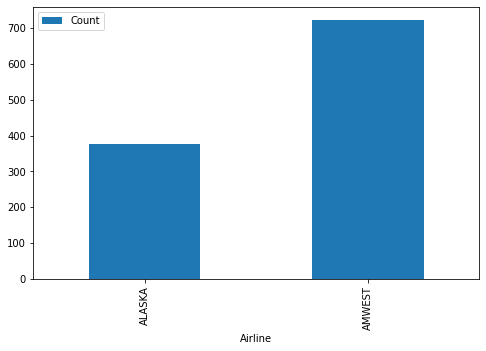

In [23]:
#Graph the total flights for each airline with Bar Graph
DataAir = Data.groupby(['Airline']).mean()
DataAir.plot(kind='bar', figsize=(8,5), colormap='tab20')
plt.show()

Let us examine the graph of the total values of arrivals by Status and City destination

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


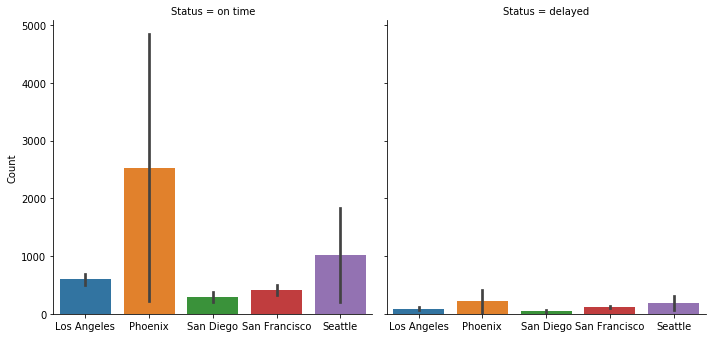

In [24]:
fg = sns.factorplot(x='City', y='Count', 
                        col='Status', data=Data, kind='bar')
fg.set_xlabels('')

And again by Status and City

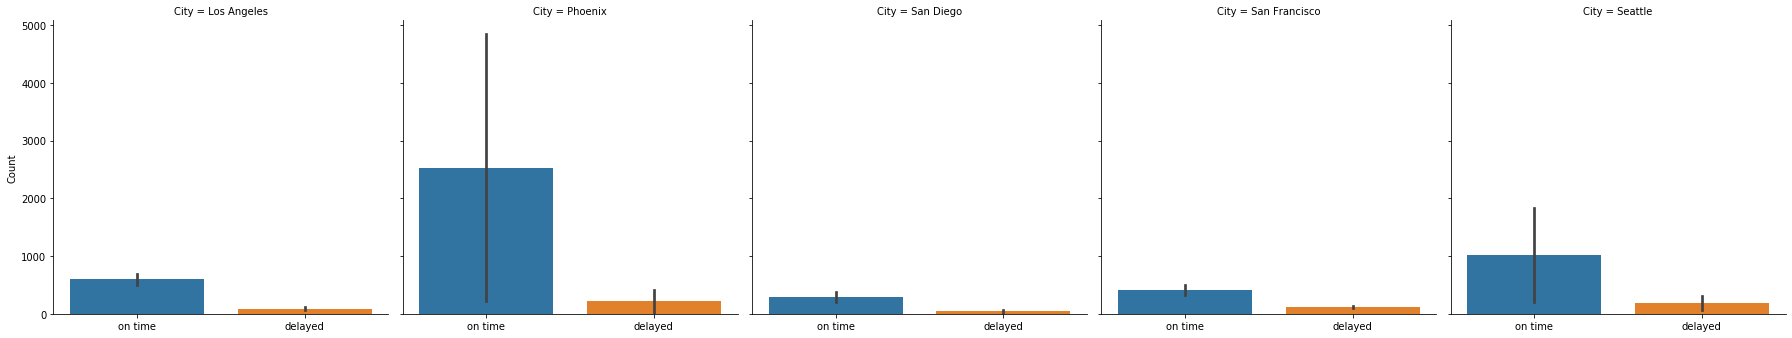

In [25]:
fg = sns.factorplot(x='Status', y='Count', 
                        col='City', data=Data, kind='bar')
fg.set_xlabels('')

Finally by Airline and City

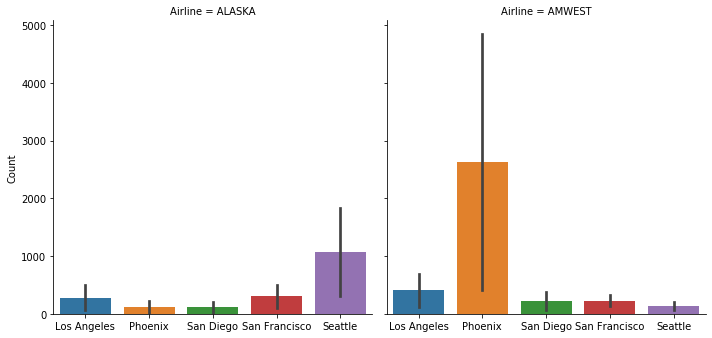

In [26]:
fg = sns.factorplot(x='City', y='Count', 
                        col='Airline', data=Data, kind='bar')
fg.set_xlabels('')

# 1.3 
Finally, given your “tidy” long format structure, consider what, if any, changes you would make to the visual presentation of the data if you were then asked to transform your “long” data back into a “wide” format: would you mimic the structure of the graphic shown above? If not, how might you transform your “long” data to “wide” format to make its “wide” presentation easier to understand and work with? Provide an example of your recommendation.


Firstly I would not go back to a "wide" format, since there are multiple attributes for each datapoint, it makes sense to keep the data in a long format. However, I were tasked to do so, I would make some changes. 
-First, the row with no values would be gone. 
-In terms of heirarchial indexing, I would start with the airline, then I would include the city. As for the columns, I would select the "One Time" and "Delayed". The benefit of this is to show a count for each city and we can see how many are on time vs delayed for each airline.

In [27]:
#Cast the count column into an array
x = np.array(Data['Count'])

In [28]:
#Reshape appropriately so that we can add to example
x1 = x.reshape((10,2))

In [29]:
Myframe = pd.DataFrame(x1,
                     index=[['Alaska', 'Alaska','Alaska', 'Alaska', 'Alaska',
                             'AMWEST','AMWEST','AMWEST','AMWEST','AMWEST'],
                            ['Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle',
                             'Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle']],
                     columns=['On Time','Delayed'])
Myframe

On Time  Delayed
Alaska Los Angeles      497.0     62.0
       Phoenix          694.0    117.0
       San Diego        221.0     12.0
       San Francisco   4840.0    415.0
       Seattle          212.0     20.0
AMWEST Los Angeles      383.0     65.0
       Phoenix          503.0    102.0
       San Diego        320.0    129.0
       San Francisco   1841.0    305.0
       Seattle          201.0     61.0

# Part 2: Using Your GroupBy and Data Aggregation Skills

In [30]:
#Loading DataFrame from Github Link
df = pd.read_csv("https://raw.githubusercontent.com/atreish/AIM-5001/main/bridges.data.version1.csv")

In [31]:
#Name the columns according to the Website description
df.columns = ['IDENTIF', 'RIVER', 'LOCATION', 'ERECTED', 'PURPOSE', 
              'LENGTH', 'LANES', 'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L', 'TYPE']
df

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
2,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
3,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD
4,E7,A,27,1840,HIGHWAY,990,2,N,THROUGH,WOOD,MEDIUM,S,WOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,E84,A,24,1969,HIGHWAY,870,6,G,THROUGH,STEEL,MEDIUM,F,ARCH
103,E91,O,44,1975,HIGHWAY,3756,6,G,THROUGH,STEEL,LONG,F,ARCH
104,E90,M,7,1978,HIGHWAY,950,6,G,THROUGH,STEEL,LONG,F,ARCH
105,E100,O,43,1982,HIGHWAY,?,?,G,?,?,?,F,?


Notice we have missing values for Material, and since we will use this Column, we have to either remove them or fill them in, the best way I think would be to fill them in by first doing a bit of investigating on what material they most likely would be. So let's graph the development of each material in time.

In [32]:
df['#Wood'] = (df['MATERIAL'].apply(lambda x: 1 if (x == "WOOD") else 0)).cumsum()
df['#Iron'] = (df['MATERIAL'].apply(lambda x: 1 if (x == "IRON") else 0)).cumsum()
df['#Steel'] = (df['MATERIAL'].apply(lambda x: 1 if (x == "STEEL") else 0)).cumsum()

Final Building constructions based on material
15 wood 11 iron 79 steel


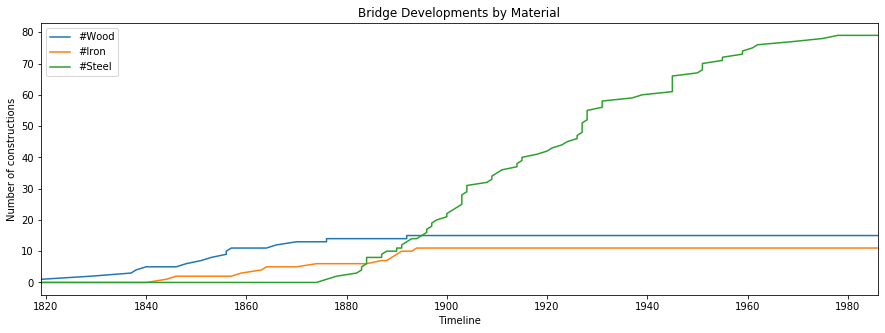

In [33]:
#This will print the cumsum of each material over time. For my own curiouity mostly
ref = df.iloc[-1]
print('Final Building constructions based on material\n{} wood {} iron {} steel'.format(ref['#Wood'], 
                                                                                       ref['#Iron'], 
                                                                                       ref['#Steel']))
df.set_index('ERECTED')[['#Wood', '#Iron', '#Steel']].plot(figsize=(15,5), title='Bridge Developments by Material')
plt.ylabel('Number of constructions')
plt.xlabel('Timeline')
plt.show()

Clearly, the last two values Steel in row 105 and 106, we can fill that in.

In [34]:
df['MATERIAL'].iloc[105]='STEEL'
df['MATERIAL'].iloc[106]='STEEL'

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# 2.1 
You’ve been asked to generate a quick report that tells us how many bridges of each ‘Purpose’/’Material’ grouping within the data set have been constructed over each of the rivers listed in the data set. For each river, your output should include the Purpose, Material, and count (aka ‘How Many?’), similar to the output shown in the graphic below for River 'A', and your report should include similar content for each of the rivers contained within the data set.

In [35]:
"""Here we apply a groupby to the relevant order, then apply the size() function to get the count, 
finally cast to another column using to_frame() function titled -How Many?- and we are done"""

df.groupby(['RIVER','PURPOSE','MATERIAL']).size().to_frame(name = 'How Many?')

How Many?
RIVER PURPOSE  MATERIAL           
A     AQUEDUCT IRON              1
               WOOD              3
      HIGHWAY  IRON              2
               STEEL            22
               WOOD              8
      RR       IRON              1
               STEEL             9
               WOOD              2
      WALK     STEEL             1
M     HIGHWAY  IRON              4
               STEEL            19
               WOOD              2
      RR       IRON              2
               STEEL            13
O     HIGHWAY  IRON              1
               STEEL            10
      RR       STEEL             4
Y     HIGHWAY  STEEL             2
      RR       STEEL             1

Here we have the report showing the count for each Material of bridges across each river divided by purpose as requested

# 2.2 
You’ve been asked to generate a second report that shows the average length for each ‘Purpose’/’Material’ bridge grouping within the data set. As you should recall from our previous work with the Pittsburgh Bridges data set, the ‘Length’ attribute is not provided to us in a numeric format and also contains many missing values. As such, you should clean up the contents of that column and convert it to numeric format before attempting to generate your report. The output of your report should appear as shown in the graphic below.

You are allowed to use no more than four (4) lines of Python/Pandas code AFTER you’ve finished cleaning up the ‘Length’ column (which should take no more than 2-3 lines of code) and you MUST use Pandas’ groupby and/or aggregation functionality to accomplish the task. Be sure to include a brief narrative explaining how your proposed code would accomplish the task.

In [36]:
#First Call the lenght column so we view the details, notice it is NOT numeric dtype=object
length_col = np.array(df['LENGTH'])
length_col

array(['1037', '?', '1000', '?', '990', '1000', '1500', '?', '1000', '?',
       '1200', '?', '?', '1030', '1000', '1200', '1000', '1000', '?',
       '1245', '1200', '?', '?', '?', '1150', '?', '1080', '1000', '?',
       '1161', '4558', '1120', '?', '1000', '?', '1350', '?', '1092', '?',
       '?', '2367', '?', '1040', '4000', '2264', '2000', '1200', '2000',
       '?', '1850', '1300', '3000', '1417', '1154', '1200', '965', '1504',
       '1240', '?', '1730', '1620', '1652', '?', '2210', '2822', '1000',
       '2300', '2122', '?', '885', '2365', '860', '884', '1770', '1508',
       '2663', '1330', '2678', '2220', '860', '2250', '1365', '1450',
       '1500', '1690', '1800', '1060', '840', '1710', '2160', '?', '?',
       '1320', '900', '2423', '1031', '2300', '804', '1700', '1000',
       '980', '2213', '870', '3756', '950', '?', '?'], dtype=object)

Here we will perform the request in 3 lines of code

In [37]:
#Next we will cast the entire column as a numeric data type and replace all '?' strings with a NAN
df.LENGTH = pd.to_numeric(df['LENGTH'].replace('?', np.nan))

#Finally we call groupby function to apply mean() and cast it to a column names Avgerage Length using to_frame()
df_avg_length_col = df.groupby(['PURPOSE','MATERIAL']).LENGTH.agg('mean').to_frame(name='Average Length')
df_avg_length_col

Average Length
PURPOSE  MATERIAL                
AQUEDUCT IRON         1000.000000
         WOOD         1092.000000
HIGHWAY  IRON         1216.666667
         STEEL        1557.804348
         WOOD         1053.375000
RR       IRON         1100.000000
         STEEL        1946.850000
         WOOD                 NaN
WALK     STEEL                NaN

# 2.3
Finally, you’ve been asked to generate one last report that shows the average length, count,
minimum length, and maximum length of bridges built during 4 equal length time periods (1818 – 1860; 1860-
1902; 1902-1944; 1944-1986). The output of your report should appear as shown in the graphic below.

You are allowed to use no more than seven (7) lines of Python/Pandas code and you must use Pandas’ groupby and/or aggregation functionality to accomplish the task. Be sure to include a brief narrative explaining how your proposed code would accomplish the task.

The next cell will generate the report in 5 lines of code

In [38]:
#Cut the intervals of the timeline in our data frame's ERECTED column into 4 parts
intervals = pd.cut(df.ERECTED, 4)

#define columns for each group which ccontains the desired stats: Average, COunt, Maximum and Minimum
#note that this returns a dict
def mean_count_max_min(group):
    return {'Average Length':group.mean(),'Count':group.count(),
            'Max Length':group.max(),'Min Length':group.min()}

#create a groupby based on length (which we have made into numeric format) and use the 4 intervals
df_length_in_intervals = df.LENGTH.groupby(intervals)

#apply the above function to get statistics of our groupby frame, but since it has dicts we apply unstack()
df_length_in_intervals.apply(mean_count_max_min).unstack()

,Average Length,Count,Max Length,Min Length
ERECTED,,,,
"(1818.833, 1860.75]",1094.625000,8.0,1500.0,990.0
"(1860.75, 1902.5]",1603.347826,23.0,4558.0,1000.0
"(1902.5, 1944.25]",1676.181818,33.0,3000.0,860.0
"(1944.25, 1986.0]",1530.411765,17.0,3756.0,804.0
